<Figure size 432x288 with 0 Axes>

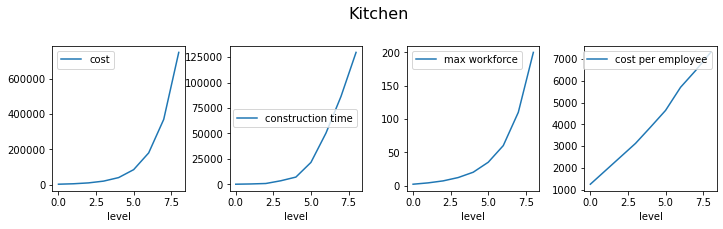

     cost  constructionTime  employer.maxWorkforce  costTotal  \
0    2500               200                      2       2500   
1    5000               450                      4       7500   
2   10000               900                      7      17500   
3   20000              3600                     12      37500   
4   40000              7200                     20      77500   
5   85000             21600                     35     162500   
6  180000             50400                     60     342500   
7  370000             86400                    110     712500   
8  750000            129600                    200    1462500   

   employer.costPerEmployee  
0               1250.000000  
1               1875.000000  
2               2500.000000  
3               3125.000000  
4               3875.000000  
5               4642.857143  
6               5708.333333  
7               6477.272727  
8               7312.500000  




<Figure size 432x288 with 0 Axes>

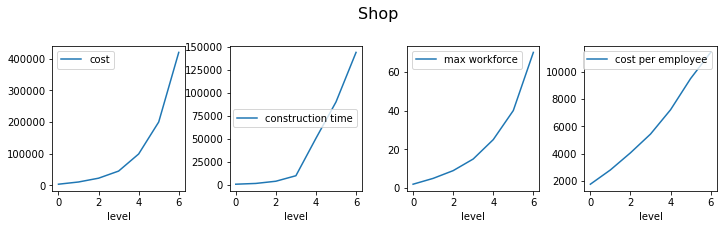

     cost  constructionTime  employer.maxWorkforce  costTotal  \
0    3500               360                      2       3500   
1   10500              1200                      5      14000   
2   22500              3600                      9      36500   
3   45000              9600                     15      81500   
4   99000             50400                     25     180500   
5  200000             90000                     40     380500   
6  420000            144000                     70     800500   

   employer.costPerEmployee  
0               1750.000000  
1               2800.000000  
2               4055.555556  
3               5433.333333  
4               7220.000000  
5               9512.500000  
6              11435.714286  




<Figure size 432x288 with 0 Axes>

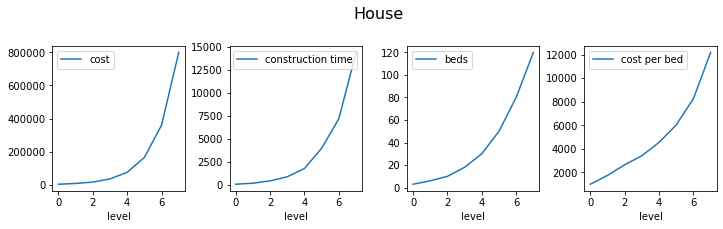

     cost  constructionTime  residence.beds  costTotal  residence.costPerBed
0    3000                90               3       3000           1000.000000
1    7500               200               6      10500           1750.000000
2   16000               450              10      26500           2650.000000
3   35000               900              18      61500           3416.666667
4   75000              1800              30     136500           4550.000000
5  165000              4000              50     301500           6030.000000
6  360000              7200              80     661500           8268.750000
7  800000             14400             120    1461500          12179.166667


    cost  constructionTime  costTotal
0  30000              3600      30000




<Figure size 432x288 with 0 Axes>

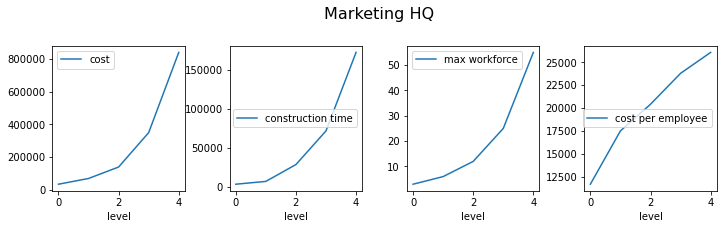

     cost  constructionTime  employer.maxWorkforce  costTotal  \
0   35000              3600                      3      35000   
1   70000              7200                      6     105000   
2  140000             28800                     12     245000   
3  350000             72000                     25     595000   
4  840000            172800                     55    1435000   

   employer.costPerEmployee  
0              11666.666667  
1              17500.000000  
2              20416.666667  
3              23800.000000  
4              26090.909091  


     cost  constructionTime  costTotal
0  200000              9600     200000


In [18]:
from matplotlib import pyplot as plt
import pandas as pd
import requests, json
%matplotlib inline

url = requests.get("http://localhost:3000/api/gamedata")
data = json.loads(url.text)

for k in data['buildings']:
    b = data['buildings'][k]

    df = pd.json_normalize(b['levelInfos'], max_level=1)
    df['costTotal'] = df['cost'].cumsum()
    
    print('\n')
    
    if len(b['levelInfos']) < 2:
        print(df)
        continue
    
    plt.figure()
    fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
    fig.suptitle(b['title'], fontsize=16)
    fig.tight_layout()
    plt.subplots_adjust(top=0.8)
    
    axes[0].set_xlabel('level')
    axes[1].set_xlabel('level')
    axes[2].set_xlabel('level')
    axes[3].set_xlabel('level')
    
    df['cost'].plot(ax=axes[0], legend=True)
    
    df['constructionTime'].plot(ax=axes[1], legend=True, label='construction time')
    
    if 'employer.maxWorkforce' in df:
        df['employer.costPerEmployee'] =  df['costTotal'] / df['employer.maxWorkforce']
        df['employer.maxWorkforce'].plot(ax=axes[2], legend=True, label='max workforce')
        df['employer.costPerEmployee'].plot(ax=axes[3], legend=True, label='cost per employee')
        
    if 'residence.beds' in df:
        df['residence.costPerBed'] = df['costTotal'] / df['residence.beds']
        df['residence.beds'].plot(ax=axes[2], legend=True, label='beds')
        df['residence.costPerBed'].plot(ax=axes[3], legend=True, label='cost per bed')
        
    plt.show()
    print(df)

